<a href="https://colab.research.google.com/github/juhumkwon/Defense_Cloud/blob/main/Assignment_1(Classifier_Performance_Evaluation).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

=== Decision Tree ===
              precision    recall  f1-score   support

           0       0.83      0.92      0.87        93
           1       0.93      0.83      0.88       107

    accuracy                           0.88       200
   macro avg       0.88      0.88      0.87       200
weighted avg       0.88      0.88      0.88       200

=== Bagging ===
              precision    recall  f1-score   support

           0       0.83      0.95      0.88        93
           1       0.95      0.83      0.89       107

    accuracy                           0.89       200
   macro avg       0.89      0.89      0.88       200
weighted avg       0.89      0.89      0.89       200

=== Random Forest ===
              precision    recall  f1-score   support

           0       0.85      0.95      0.90        93
           1       0.95      0.86      0.90       107

    accuracy                           0.90       200
   macro avg       0.90      0.90      0.90       200
weighted avg  

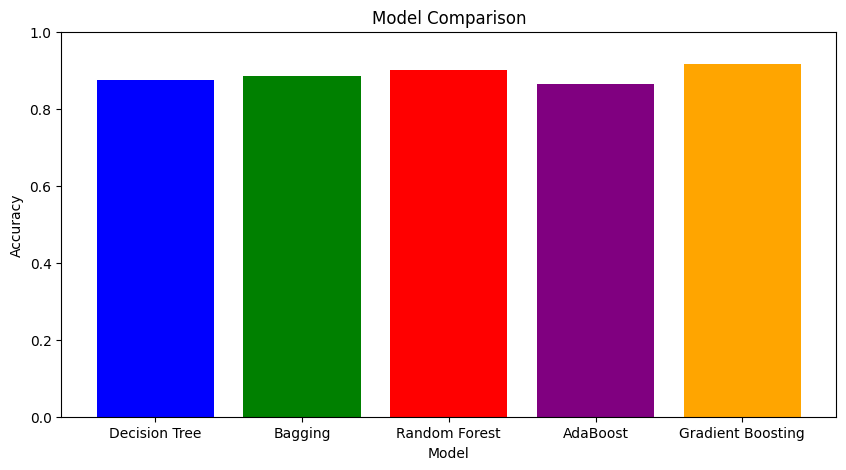

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# 데이터 생성 (1000개 샘플, 20개 특징)
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# 학습/테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 정의
# base_estimator is replaced with estimator
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Bagging": BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42)
}

# 모델 학습 및 평가
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)  # 학습
    y_pred = model.predict(X_test)  # 예측
    acc = accuracy_score(y_test, y_pred)  # 정확도 계산
    results[name] = acc
    print(f"=== {name} ===")
    print(classification_report(y_test, y_pred))

# 성능 비교 시각화
plt.figure(figsize=(10, 5))
plt.bar(results.keys(), results.values(), color=['blue', 'green', 'red', 'purple', 'orange'])
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Model Comparison")
plt.ylim(0, 1)
plt.show()